In [8]:
import pandas as pd
import numpy as np
import glob
from sklearn.metrics import mean_squared_error as mse
import datetime
import seaborn as sns

from app.historical_price import HistoricalPrice
from app.random_variable import RandomVariable

In [9]:
daily_corrs = pd.read_csv("data/daily_returns_kendall_correlation_lag0.csv",index_col=0)
weekly_corrs = pd.read_csv("data/weekly_returns_kendall_correlation_lag0.csv",index_col=0)
monthly_corrs = pd.read_csv("data/monthly_returns_kendall_correlation_lag0.csv",index_col=0)
weekly_corrs.shape,daily_corrs.shape,monthly_corrs.shape


((504242, 2), (423002, 2), (456400, 2))

In [10]:
# w = weekly_corrs.index.str.split("_").tolist()
# w = list(map(list, zip(*w)))
# weekly_corrs['predictor'] = w[1]
# weekly_corrs['target'] = w[0]

# # d = daily_corrs.index.str.split("_").tolist()
# # d = list(map(list, zip(*d)))
# # daily_corrs['predictor'] = d[1]
# # daily_corrs['target'] = d[0]

# # m = monthly_corrs.index.str.split("_").tolist()
# # m= list(map(list, zip(*m)))
# # monthly_corrs['predictor'] = m[1]
# # monthly_corrs['target'] = m[0]

# weekly_corrs.head()

In [11]:
# candidates = ['MSN', 'VNM', 'LIX', 'DBD', 'DHG','ABT', 'OPC', 'TRA'] 

In [12]:
weekly_corrs = weekly_corrs.loc[:].sort_values(by=['kendall'],ascending=False)
daily_corrs = daily_corrs.loc[:].sort_values(by=['kendall'],ascending=False)
monthly_corrs = monthly_corrs.loc[:].sort_values(by=['kendall'],ascending=False)

In [13]:
### STRONG CORRELATION
# strong_daily_corrs = daily_corrs[(np.abs(daily_corrs['kendall'])>0.2)&(daily_corrs['p_value']<0.05)]
# strong_weekly_corrs = weekly_corrs[(np.abs(weekly_corrs['kendall'])>0.1)&(weekly_corrs['p_value']<0.05)]
# strong_monthly_corrs = monthly_corrs[(np.abs(monthly_corrs['kendall'])>0.3)&(monthly_corrs['p_value']<0.05)]
# strong_daily_corrs.shape,strong_weekly_corrs.shape,strong_monthly_corrs.shape

In [14]:
### highest kendall for monthly, lag 0: 72
### highest kendall for monthly, lag 1: 0.47
### highest kendall for monthly, lag 1: 0.39

### highest kendall for weekly, lag 0: 0.7
### highest kendall for weekly, lag 1: 0.22
### highest kendall for weekly, lag 2: 0.18

### highest kendall for daily, lag 0: 0.63
### highest kendall for daily, lag 1: 0.22
### highest kendall for daily, lag 2: 0.

# strong_daily_corrs.head(100)

In [15]:
weekly_corrs.head(20)

,kendall,p_value
BVS_KLS,0.701992,6.245219e-105
KLS_BVS,0.701992,6.245219e-105
SSI_KLS,0.660821,2.853841e-93
KLS_SSI,0.660821,2.853841e-93
SSI_VND,0.651052,6.265245e-150
VND_SSI,0.651052,6.265245e-150
SSI_HCM,0.640257,2.369974e-154
HCM_SSI,0.640257,2.369974e-154
KLS_CTS,0.630998,1.943426e-69
CTS_KLS,0.630998,1.943426e-69


In [16]:
daily_corrs.head(),weekly_corrs.head()

(          kendall  p_value
 KLS_BVS  0.630761      0.0
 BVS_KLS  0.630761      0.0
 HCM_SSI  0.598713      0.0
 SSI_HCM  0.598713      0.0
 SSI_KLS  0.580907      0.0,
           kendall        p_value
 BVS_KLS  0.701992  6.245219e-105
 KLS_BVS  0.701992  6.245219e-105
 SSI_KLS  0.660821   2.853841e-93
 KLS_SSI  0.660821   2.853841e-93
 SSI_VND  0.651052  6.265245e-150)

In [17]:
corrs = monthly_corrs.join(weekly_corrs,lsuffix='_m', rsuffix='_w')
corrs = corrs.join(daily_corrs)
corrs.head()

,kendall_m,p_value_m,kendall_w,p_value_w,kendall,p_value
KLS_BVS,0.721047,6.362385e-19,0.701992,6.245219e-105,0.630761,0.000000e+00
BVS_KLS,0.721047,6.362385e-19,0.701992,6.245219e-105,0.630761,0.000000e+00
SSI_VND,0.689351,3.622511e-29,0.651052,6.265245e-150,0.561512,0.000000e+00
VND_SSI,0.689351,3.622511e-29,0.651052,6.265245e-150,0.561512,0.000000e+00
SSI_VCI,0.676692,1.049191e-13,0.523497,8.273666e-48,0.468658,1.328772e-174


In [18]:
corrs['kendall_diff_m'] = corrs['kendall_m'] - corrs['kendall']
corrs['kendall_diff_w'] = corrs['kendall_w'] - corrs['kendall']
corrs.head()

,kendall_m,p_value_m,kendall_w,p_value_w,kendall,p_value,kendall_diff_m,kendall_diff_w
KLS_BVS,0.721047,6.362385e-19,0.701992,6.245219e-105,0.630761,0.000000e+00,0.090287,0.071231
BVS_KLS,0.721047,6.362385e-19,0.701992,6.245219e-105,0.630761,0.000000e+00,0.090287,0.071231
SSI_VND,0.689351,3.622511e-29,0.651052,6.265245e-150,0.561512,0.000000e+00,0.127839,0.089540
VND_SSI,0.689351,3.622511e-29,0.651052,6.265245e-150,0.561512,0.000000e+00,0.127839,0.089540
SSI_VCI,0.676692,1.049191e-13,0.523497,8.273666e-48,0.468658,1.328772e-174,0.208034,0.054839


In [21]:
# FREQ = 'm'
FREQ = 'w'

lag0 = corrs.loc[(np.abs(corrs[f'kendall_diff_{FREQ}'])>=0.1)&(corrs[f'kendall_{FREQ}']>=0.3),[f'kendall_{FREQ}','kendall',f'kendall_diff_{FREQ}']].sort_values(by=[f'kendall_diff_{FREQ}',f'kendall_{FREQ}'],ascending=False).dropna()
lag0[lag0.columns] = lag0[lag0.columns].round(3)
lag0 = lag0.drop_duplicates()
lag0.shape,lag0.head(30)

((1275, 3),
          kendall_w  kendall  kendall_diff_w
 LAS_TDG      0.311    0.115           0.196
 PLP_TTH      0.363    0.168           0.195
 KBC_PLP      0.342    0.156           0.187
 SNG_PIT      0.384    0.199           0.186
 VRE_DLG      0.316    0.131           0.185
 CII_BAB      0.306    0.123           0.183
 STP_SNG      0.512    0.332           0.180
 PLP_ITQ      0.332    0.154           0.179
 KSQ_QBS      0.306    0.132           0.175
 KLS_BCE      0.398    0.225           0.173
 PLP_DQC      0.341    0.169           0.172
 TC6_SNG      0.412    0.241           0.171
 HII_DXP      0.311    0.140           0.170
 VC2_CIC      0.374    0.204           0.170
 SD6_PLP      0.333    0.164           0.169
 VE1_SNG      0.374    0.205           0.168
 BMC_VGS      0.376    0.208           0.168
 QBS_FCM      0.337    0.170           0.168
 BSI_HDB      0.390    0.223           0.167
 VTO_SNG      0.454    0.289           0.165
 PLP_DRH      0.363    0.199           0.16

In [22]:
target,predictor = np.array([i.split("_") for i in lag0.index]).T
lag0['predictor'] = predictor
lag0['target'] = target
lag0.head()

,kendall_w,kendall,kendall_diff_w,predictor,target
LAS_TDG,0.311,0.115,0.196,TDG,LAS
PLP_TTH,0.363,0.168,0.195,TTH,PLP
KBC_PLP,0.342,0.156,0.187,PLP,KBC
SNG_PIT,0.384,0.199,0.186,PIT,SNG
VRE_DLG,0.316,0.131,0.185,DLG,VRE


- Correlation is stronger in the monthly returns 

In [23]:
tickers = pd.read_csv('data/tickers.csv',index_col=0)
tickers = tickers.loc[tickers['status']=='listed',['industry','sub_industry','status','companyName','floor']]
tickers.head()

,industry,sub_industry,status,companyName,floor
PVD,Oil & Gas,"Oil Equipment, Services & Distribution",listed,Tổng Công ty Cổ phần Khoan và Dịch vụ khoan dầ...,HOSE
PVC,Oil & Gas,"Oil Equipment, Services & Distribution",listed,Tổng công ty Hóa chất và Dịch vụ Dầu khí - CTC...,HNX
PLX,Oil & Gas,Oil & Gas Producers,listed,Tập đoàn Xăng dầu Việt Nam,HOSE
PVS,Oil & Gas,"Oil Equipment, Services & Distribution",listed,Tổng Công ty Cổ phần Dịch vụ Kỹ thuật Dầu khí ...,HNX
PVB,Oil & Gas,"Oil Equipment, Services & Distribution",listed,Công ty Cổ phần Bọc Ống Dầu khí Việt Nam,HNX


In [24]:
lag0 = pd.merge(tickers,lag0, left_index=True, right_on='predictor')
lag0 = pd.merge(tickers,lag0, left_index=True, right_on='target',suffixes=('_p', '_t'))
lag0 = lag0.loc[(lag0['status_p']=='listed')&(lag0['status_t']=='listed')]
lag0 = lag0.drop(columns=['status_p','status_t'])
lag0 = lag0.sort_values(by=[f'kendall_diff_{FREQ}',f'kendall_{FREQ}'],ascending=False)
lag0 = lag0[(lag0[f'kendall_diff_{FREQ}']>0.1)&(lag0[f'kendall_{FREQ}']>0.45)]
lag0

,industry_p,sub_industry_p,companyName_p,floor_p,industry_t,sub_industry_t,companyName_t,floor_t,kendall_w,kendall,kendall_diff_w,predictor,target
MBS_BSI,Financial Services,NaN,Công ty Cổ phần chứng khoán MB,HNX,Financial Services,NaN,Công ty Cổ phần Chứng khoán BIDV,HOSE,0.477,0.329,0.148,BSI,MBS
TLH_VGS,Basic Resources,Industrial Metals,Công ty Cổ phần Tập đoàn thép Tiến Lên,HOSE,Basic Resources,Industrial Metals,Công ty Cổ phần Ống thép Việt Đức VG PIPE,HNX,0.492,0.348,0.145,VGS,TLH
BID_ACB,Banks,NaN,Ngân hàng Thương mại Cổ phần Đầu tư và Phát tr...,HOSE,Banks,NaN,Ngân hàng Thương mại Cổ phần Á Châu,HOSE,0.502,0.358,0.144,ACB,BID
LPB_STB,Banks,NaN,Ngân hàng Thương mại Cổ phần Bưu điện Liên Việt,HOSE,Banks,NaN,Ngân hàng Thương mại Cổ phần Sài Gòn Thương Tín,HOSE,0.533,0.390,0.143,STB,LPB
SD6_SDT,Construction & Materials,Construction & Materials,Công ty Cổ phần Sông Đà 6,HNX,Construction & Materials,Construction & Materials,Công ty Cổ phần Sông Đà 10,HNX,0.470,0.331,0.139,SDT,SD6
HDB_SHS,Banks,NaN,Ngân hàng Thương mại Cổ phần Phát triển Thành ...,HOSE,Financial Services,NaN,Công ty Cổ phần Chứng khoán Sài Gòn Hà Nội,HNX,0.451,0.313,0.138,SHS,HDB
ACB_HDB,Banks,NaN,Ngân hàng Thương mại Cổ phần Á Châu,HOSE,Banks,NaN,Ngân hàng Thương mại Cổ phần Phát triển Thành ...,HOSE,0.512,0.377,0.135,HDB,ACB
SDT_SD9,Construction & Materials,Construction & Materials,Công ty Cổ phần Sông Đà 10,HNX,Construction & Materials,Construction & Materials,Công ty Cổ phần Sông Đà 9,HNX,0.469,0.335,0.134,SD9,SDT
VCG_DIG,Construction & Materials,Construction & Materials,Tổng Công ty Cổ phần Xuất nhập khẩu và xây dựn...,HOSE,Real Estate,NaN,Tổng công ty Đầu tư phát triển Xây dựng,HOSE,0.453,0.322,0.132,DIG,VCG
MBB_VND,Banks,NaN,Ngân hàng Thương mại Cổ phần Quân đội,HOSE,Financial Services,NaN,Công ty Cổ phần Chứng khoán VNDIRECT,HOSE,0.462,0.332,0.130,VND,MBB


In [25]:
hp = HistoricalPrice()
daily_returns = hp.get_returns(freq='daily')
weekly_returns = hp.get_returns(freq='weekly')
monthly_returns = hp.get_returns(freq='monthly')

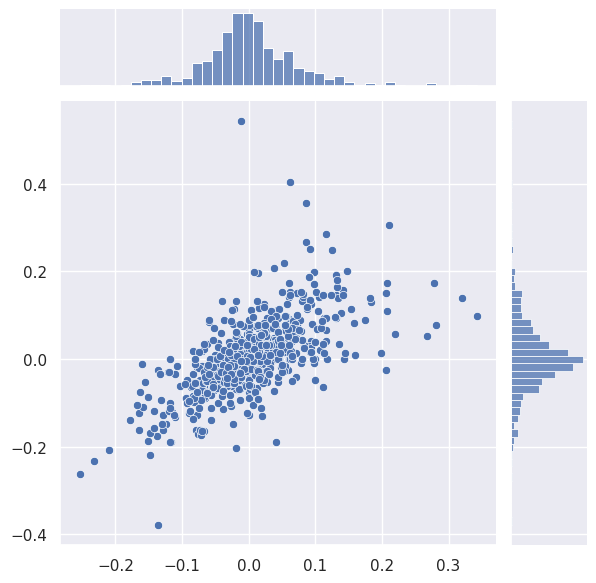

In [66]:
pair = ['TLH','VGS']
X = weekly_returns.loc[:,pair]
X[pair[0]] = X[pair[0]].shift(0)
X = X.dropna().values
sns.jointplot(x=X[:,0],y=X[:,1])

Text(0, 0.5, 'frequency (days or weeks)')

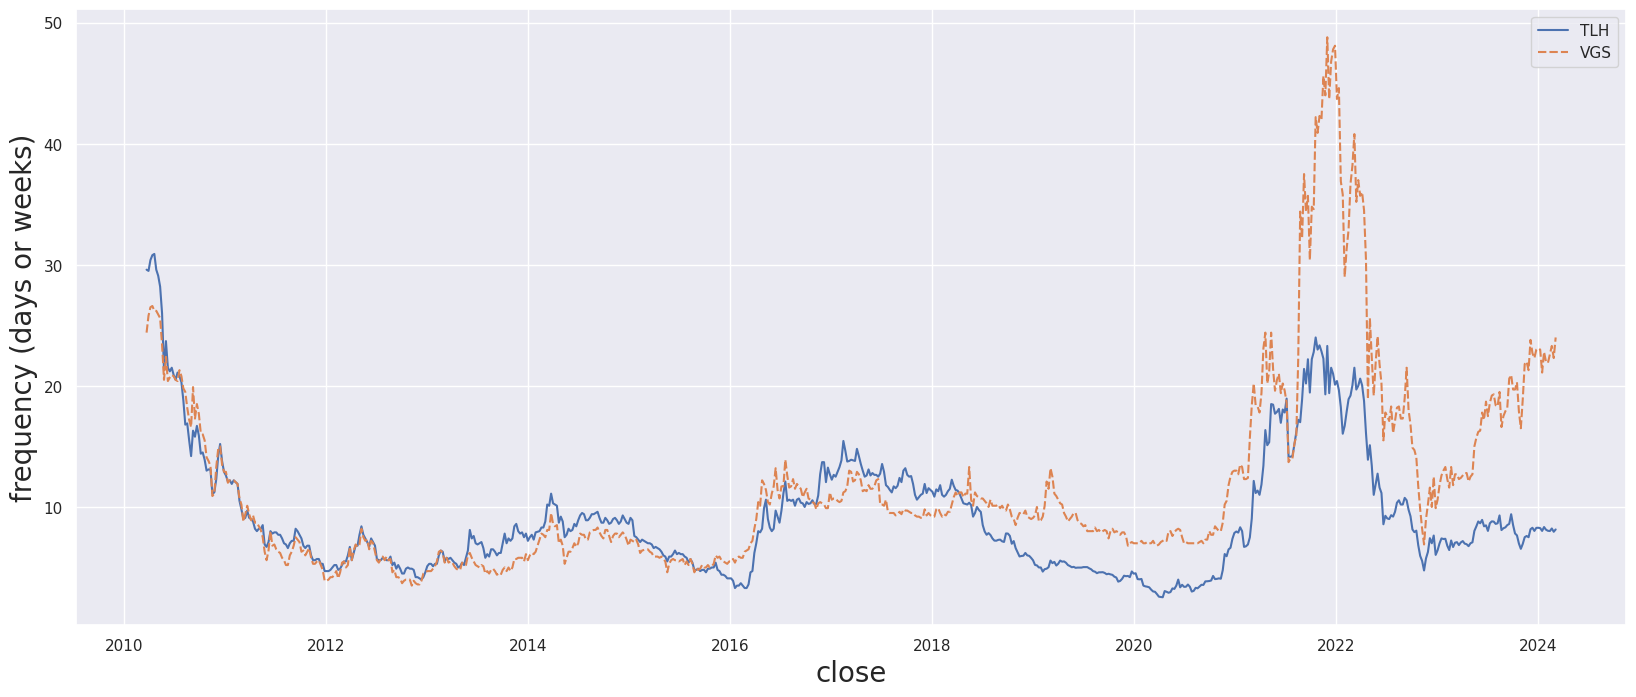

In [70]:
import seaborn as sns

freq = 'weekly'
price_0 = hp.get_asset_price(pair[0],freq)
price_1 = hp.get_asset_price(pair[1],freq)

sns.set(rc={'figure.figsize':(20,8)})

res_plot = pd.concat([price_0['close'],price_1['close']],axis=1).dropna()
res_plot.columns = pair
plot = sns.lineplot(data=res_plot)
plot.set_xlabel('close', fontsize = 20)
plot.set_ylabel('frequency (days or weeks)', fontsize = 20)

1 SignificanceResult(statistic=0.48495213252848735, pvalue=2.2281443659723266e-83) (722, 2)
2 SignificanceResult(statistic=0.48299777713580605, pvalue=3.310476361505791e-83) (721, 2)
3 SignificanceResult(statistic=0.5095786774397771, pvalue=1.4475010543121012e-92) (720, 2)
4 SignificanceResult(statistic=0.49972940268550137, pvalue=4.151472506778139e-89) (719, 2)
5 SignificanceResult(statistic=0.5220770140152815, pvalue=6.666207921415115e-97) (718, 2)


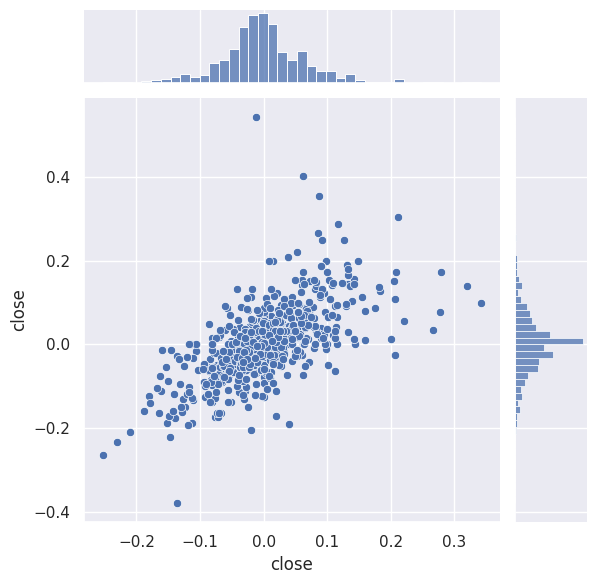

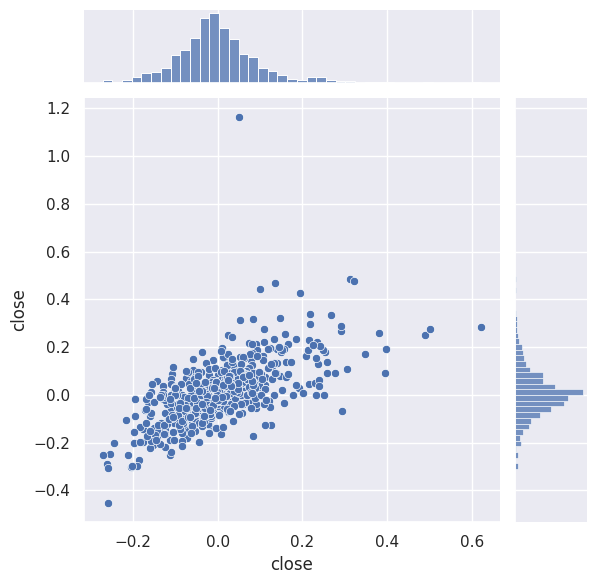

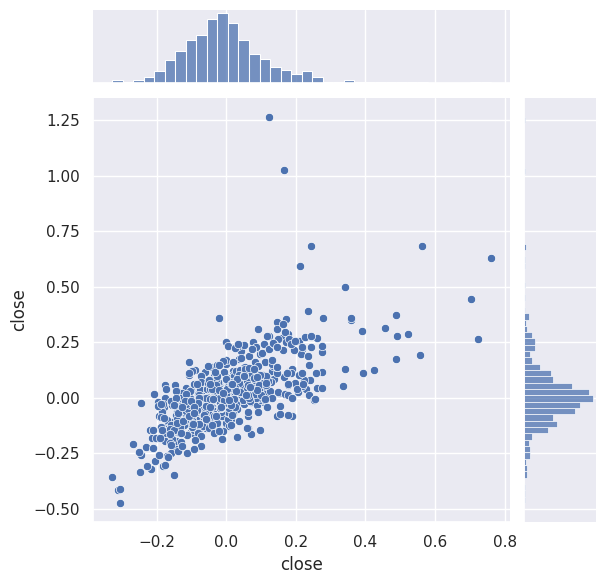

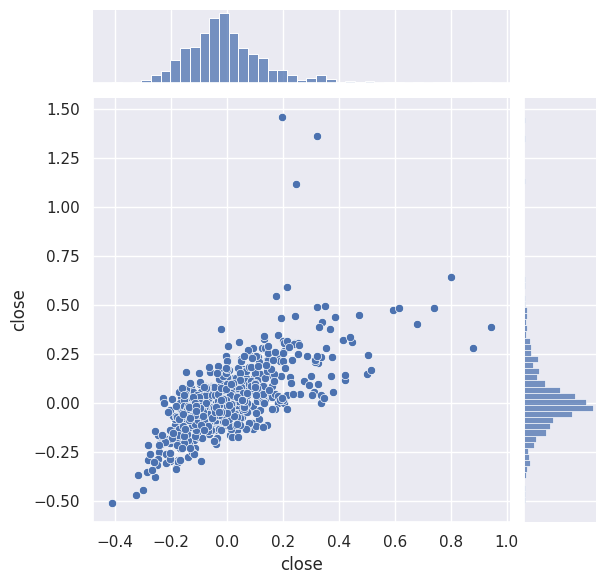

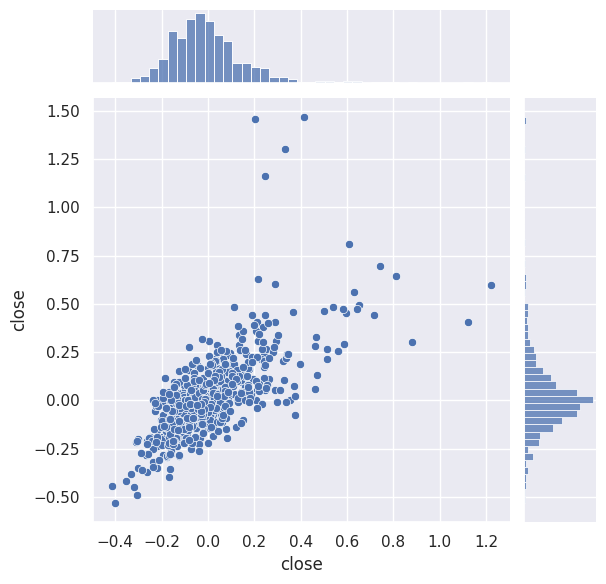

In [71]:
from scipy import stats
import pandas as pd
for i in range(1,6):
    returns0 = price_0['close']/price_0['close'].shift(i) - 1
    returns1 = price_1['close']/price_1['close'].shift(i) - 1
    joined= pd.concat([returns0,returns1],axis=1).dropna()
    print(i,stats.kendalltau(joined.iloc[:,0],joined.iloc[:,1]),joined.shape)
    sns.jointplot(x=joined.iloc[:,0],y=joined.iloc[:,1])
    # print(returns0.shape,returns1.shape)
### The returns converge the 
